### MAP556, Ecole Polytechnique, 2021-22

# TP 3 - Réduction de variance par échantillonage d'importance

### Exercice.  Echantillonnage d'importance

On considère $Y$ de loi gaussienne centrée réduite. On souhaite évaluer l'espérance $\mathbb E \left[ g(Y) \right]$ à partir de simulations, dans la situation où $g(y)=(y-2)^+$.


####  Question 1
Evaluer par intégration numérique déterministe (quadrature), puis par simulation Monte Carlo les valeurs de $\mathbb{E}\bigl[g(Y)\bigl]$ et $\mbox{Var}(g(Y))$.

On pourra utiliser la fonction `scipy.integrate.quad` : vérifier dans la documentation de la fonction ses variables d'entrée et de sortie.

Tracer les trajectoires des moyennes empiriques $I_n = \frac 1 n \sum_{i=1}^n (Y_i - 2)^+$ obtenues à partir de $n$ copies indépendantes $(Y_i)_{1 \le  i \le n}$ de $Y$, puis l'histogramme des erreurs pour $n$ fixé.

In [6]:
import matplotlib.pyplot as plt
from scipy.integrate import quad
import numpy as np

Esp_gY = 0.00849  Var_gY = 0.0057 

mean = 0.0065  var = 0.0040
Intervalle de confiance 95% pour E[g(Y)] = [ 3.713e-03 , 9.254e-03 ] 

erreur relative = 0.43


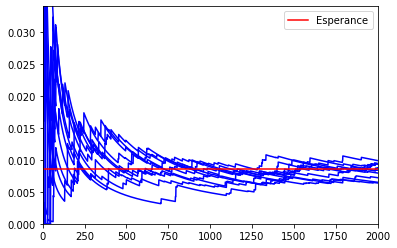

In [26]:
# densite Gaussienne standard
def densiteGaussienne(x) :
    return np.exp(-x**2./2.) / np.sqrt(2.*np.pi)

# fonction g
def g(x):
    return np.maximum(x-2.,0.)

############################################
# Calculer E[g(Y)] et Var[g(Y)] avec quadrature
# numerique (par ex. scipy.integrate.quad )
Esp_gY, erreur_quad = quad(lambda x: g(x)*densiteGaussienne(x), a=2, b=10) #b=10 is sufficient. We can also choose b=inf
Var_gY = quad(lambda x: g(x)**2*densiteGaussienne(x), a=2, b=10)[0]-Esp_gY**2

print("Esp_gY = %1.5f  Var_gY = %1.4f \n" %(Esp_gY,Var_gY))

N = 2000 # Taille echantillon
integers1toN = np.arange(1,N+1) # Un vecteur contenant les entiers de 1 a N

############################################
# Completer avec N tirages de la loi gaussienne
# centree reduite
#Y = np.random.randn(N)
Y = np.random.normal(loc=0,scale=1, size=N)

# On calcule la fonction g(Y) sur l'echantillon
GY = g(Y)

############################################
# Stocker dans 'mean' l'estimation MC de E[g(Y)]
# dans 'var' la variance empirique 
# et dans 'demiLargeurIC' la demi-largeur de l'intervalle de confiance 
# asymptotique a 95% pour E[g(Y)]
mean = np.mean(GY)
var = np.var(GY)
demiLargeurIC = 1.96*np.sqrt(var / N)

print("mean = %1.4f  var = %1.4f" %(mean,var) )
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.3e , %1.3e ] \n" %(mean - demiLargeurIC, mean + demiLargeurIC))
print("erreur relative = %1.2f" %(demiLargeurIC/mean))

################################################
# Trajectoires de la moyenne empirique
################################################
M = 10 # Nombre de repetitions 

Y = np.random.normal(loc=0,scale=1, size=(M,N))
    
# On calcule la fonction g(Y) sur l'echantillon
GY = g(Y)

################################
# Evaluer les M tirages de l'estimateur empirique
# I_n pour n=1,...,N
I_n = np.cumsum(GY, axis=1) / integers1toN

################################
# Affichage des trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 4*Esp_gY)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

####  Question 2: Echantillonnage d'importance 

**(a)** Montrer que l'on a

$$
\mathbb{E} [ g(Y) ]
=
\mathbb{E} \Bigl[ g(Z) \, e^{-\theta \, Z + \frac{\theta^2}2} \Bigr]
\qquad \forall \theta \in \mathbb R,
$$

où $Z$ est une variable aléatoire gaussienne réduite et centrée en $\theta$.

Quel est l'intérêt d'une telle formule?

**(b)** Proposer un estimateur de $\mathbb{E}[g(Y)]$ basé sur la simulation de la loi gaussienne réduite et centrée en $\theta = 2$.
On note $J_n$ cet estimateur. 

Vérifier par simulation, puis par intégration numérique, que la valeur de la variance $\mbox{Var}\Bigl(g(Z)e^{-\theta Z + \frac{\theta^2}2}\Bigr)$ a été considérablement réduite.
 
Tracer les trajectoires de l'estimateur $J_n$, comparer avec la quantité recherchée. Quel est le gain en termes de nombre de simulations de cet estimateur,
pour la même précision asymptotique que la méthode de Monte Carlo naive?

In [38]:
theta = 2.

N = 2000 # Taille echantillon
integers1toN = np.arange(1,N+1)

############################################
# Completer avec N tirages de la loi gaussienne
# centree en theta=2
# et avec le calcul de  l'estimateur d'importance
Z = np.random.normal(loc=theta, scale=1, size=N)
J = g(Z)*np.exp(-theta*Z+theta**2/2)

J_N = np.mean(J)

# variance empirique et Intervalle de confiance
var = np.var(J)
demiLargeurIC = 1.96*np.sqrt(var / N)

print("Jmean = %1.4f  Jvar = %1.6f" %(J_N, var))
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.6f , %1.6f ]" %(J_N - demiLargeurIC, J_N + demiLargeurIC))
print("erreur relative = %1.4f" %(demiLargeurIC/J_N))
print("facteur de gain en variance = %1.4f" %(Var_gY / var))

Jmean = 0.0084  Jvar = 0.000094
Intervalle de confiance 95% pour E[g(Y)] = [ 0.007936 , 0.008787 ]
erreur relative = 0.0509
facteur de gain en variance = 60.4914


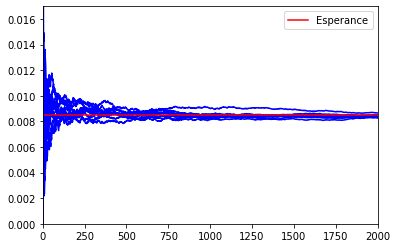

In [25]:
################################################
# Trajectoires de l'estimateur empirique
################################################
M = 10

################################
# Completer avec M tirages de l'estimateur d'importance
# J_n pour n = 1,...,N
Z = np.random.normal(loc=2, scale=1, size=(M,N))
J = g(Z)*np.exp(-theta*Z+theta**2/2)
J_n = np.cumsum(J, axis=1) / integers1toN


# Affichage des 10 trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 2*Esp_gY)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

In [34]:
############################################
# On peut aussi calculer la moyenne et la variance
# theoriques de l'estimateur d'importance par
# quadrature numerique (avec scipy.integrate.quad )

def integrand_esperance_importance(x, theta):
    return g(x) * np.exp(-theta*x + theta**2/2) * densiteGaussienne(x-theta)

def integrand_moment_2_importance(x, theta):
    return (g(x) * np.exp(-theta*x + theta**2/2))**2 * densiteGaussienne(x-theta)

# Moyenne et variance theoriques de l'estimateur d'importance 
Esp_g_theta = quad(integrand_esperance_importance, a=2, b=10, args=(theta))[0]
Var_g_theta = quad(integrand_moment_2_importance, a=2, b=10, args=(theta))[0] - Esp_g_theta**2
 
print("Esp_g_theta = %1.4f  Var_g_theta = %1.6f \n" %(Esp_g_theta, Var_g_theta))

Esp_g_theta = 0.0085  Var_g_theta = 0.000097 



####  Question 3: 
Comparer graphiquement les histogrammes des erreurs des estimateurs $I_n$ et $J_n$, pour $n=1000$.

/Users/chenyunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/chenyunhao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


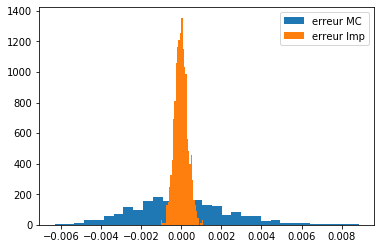

In [30]:
M = 1000 # Nombre de tirages
N = 1000 # Taille echantillon

############################################
# Completer avec M x N tirages  
# a partir de la loi N(0,1)
# et a partir de la loi N(2,1)
Y = np.random.normal(loc=0, scale=1, size=(M,N))
Z = Y + theta
GY = g(Y)

GY_importance = g(Z) * np.exp(-theta*Z+theta**2/2)

############################################
# Completer avec le calcul des erreurs des
# deux estimateurs (échantillons de taille M)
erreurMC = np.mean(GY, axis=1) - Esp_gY
erreurImportance = np.mean(GY_importance, axis=1) - Esp_gY

# Affichage de l'histogramme des erreurs
plt.hist(erreurMC , normed="True", bins=int(np.sqrt(M)), label="erreur MC")

plt.hist(erreurImportance, normed="True", bins=int(np.sqrt(M)), label="erreur Imp")

plt.legend(loc="best")
plt.show()